<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods: 6. Integration
## Simple quadrature integration methods
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Function

Define function $f$, which should be integrated between $x \in [a,b]$:
$$
\int\limits_a^b f(x) dx
$$

Example:
$$
\int\limits_{0}^{\pi/2} \sin x dx
= [-\cos x]_{0}^{\pi/2}
= -\cos (\pi/2) - (-\cos 0)
= -0 + 1
= 1
$$

In [2]:
def int_f(x):
    '''
    #----------------------------------------------------------------------
    # function f(x)
    #----------------------------------------------------------------------
    '''
    int_f = np.sin(x)
    return int_f

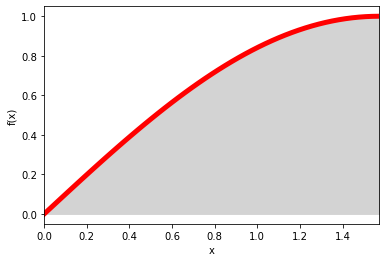

In [6]:
a = 0.
b = np.pi/2
x = np.linspace(a,b,51)
y = int_f(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim([a,b])
#plt.ylim([-0.1,1.1])
plt.fill_between(x,y,0.0,linewidth=1,color='lightgray',label='sin(x)')
plt.plot(x,y,linewidth=5,color='red',label='sin(x)')

## Mid-point rule

With the **mid-point rule**, derived from a Lagrange polynomial of **degree 0**,
we approximate the integral in the interval $[a,b]$ by calculating a single function value
in the middle of the interval, $f({{a+b}\over{2}})$:

$$
\int\limits_a^b f(x) dx \simeq (b-a) f({{a+b}\over{2}})
$$

In [7]:
def simple_midpoint(f,a,b):
    simple_midpoint = (b-a) * f((a+b)/2)
    return simple_midpoint

0.0 1.5707963267948966 0 1.5707963267948966 [0.78539816]
Mid-point:  1.1107207345395915


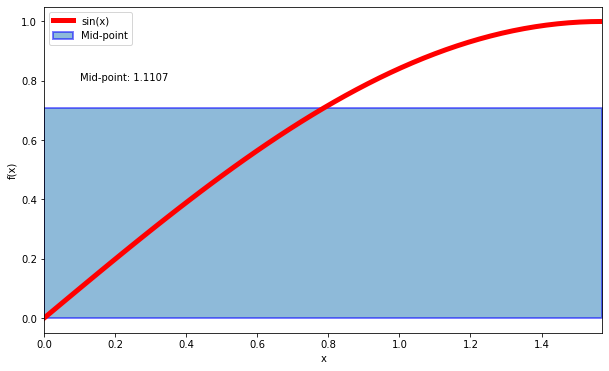

In [8]:
n = 0
h = (b-a) 
x0 = np.array([(a+b)/2])
print(a,b,n,h,x0)
I1 = simple_midpoint(int_f,a,b)
print ('Mid-point: ',I1)

plt.figure(figsize=(10,6))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim([a,b])
#plt.ylim([0.0,1.1])
plt.plot(x,y,linewidth=5,color='red',label='sin(x)')
plt.fill_between([a,b], [int_f(x0[0]),int_f(x0[0])],0.,alpha=0.5,edgecolor='b',linewidth=2,label='Mid-point')
plt.text(0.1,0.8,'Mid-point: '+str(round(I1,4)))
plt.legend()

## Trapez rule

With the **Trapez rule**, derived from a Lagrange polynomial of **degree 1**,
we approximate the integral in the interval $[a,b]$ by calculating two function values
at the end-points of the interval, $f(a)$ and $f(b)$:

$$
\int\limits_a^b f(x) dx = (b-a) {{f(a)+f(b)}\over{2}}
$$

In [9]:
def simple_trapez(f,a,b):
    simple_trapez = (b-a)/2. * (f(a) + f(b))
    return simple_trapez

0.0 1.5707963267948966 1 1.5707963267948966 [0.         1.57079633]
Trapez:  0.7854


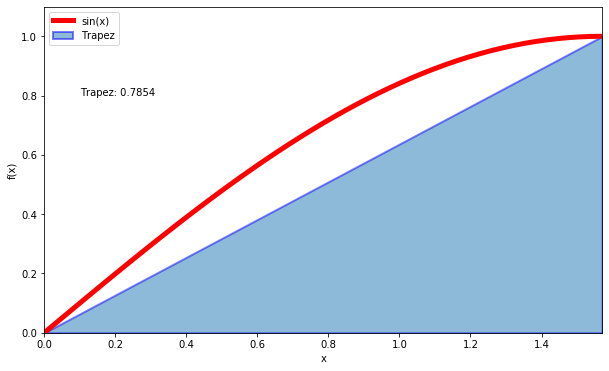

In [11]:
n = 1
h = (b-a) / n
x0 = np.array([a,a+h])
print(a,b,n,h,x0)
I2 = simple_trapez(int_f,a,b)
print ('Trapez: ',round(I2,4))

plt.figure(figsize=(10,6))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim([a,b])
plt.ylim([0.0,1.1])
plt.plot(x,y,linewidth=5,color='red',label='sin(x)')
plt.fill_between(x0, int_f(x0),0.,alpha=0.5,edgecolor='b',linewidth=2,label='Trapez')
plt.text(0.1,0.8,'Trapez: '+str(round(I2,4)))
plt.legend()

## Simpson rule

With the **Simpson rule**, derived from a Lagrange polynomial of **degree 2**,
we approximate the integral in the interval $[a,b]$ by calculating three function values
at the end-points of the interval and in the center, $f(a)$, $f({{a+b}\over{2}})$ and $f(b)$:

$$
\int\limits_a^b f(x) dx \simeq {{(b-a)}\over{6}} \left[ f(a) + 4 f({{a+b}\over{2}}) +f(b) \right]
$$

In [12]:
def simple_simpson(f,a,b):
    simple_simpson = (b-a)/6. * (f(a) + 4.*f((a+b)/2.)+ f(b))
    return simple_simpson

0.0 1.5707963267948966 2 0.7853981633974483 [0.         0.78539816 1.57079633]
Simpson:  1.0023


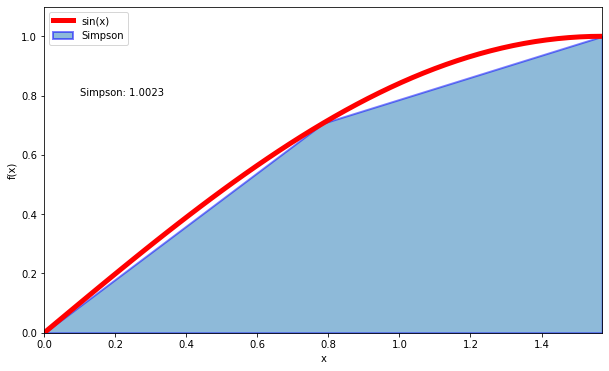

In [13]:
n = 2
h = (b-a) / n
x0 = np.array([a,a+h,a+2*h])
print(a,b,n,h,x0)
I3 = simple_simpson(int_f,a,b)
print ('Simpson: ',round(I3,4))

plt.figure(figsize=(10,6))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim([a,b])
plt.ylim([0,1.1])
plt.plot(x,y,linewidth=5,color='red',label='sin(x)')
plt.fill_between(x0, int_f(x0),0.,alpha=0.5,edgecolor='b',linewidth=2,label='Simpson')
plt.text(0.1,0.8,'Simpson: '+str(round(I3,4)))
plt.legend()

----
## Example from lecture

In [14]:
def f1(x):
    f1 = x**2
    return f1

def f2(x):
    f2 = x**4
    return f2

a=1.0
b=2.

exact1=b**3/3 - a**3/3
exact2=b**5/5 - a**5/5
print("%15s %10.3f %10.3f" % ('Exact:     ',exact1,exact2))
print("%15s %10.3f %10.3f" % ('Mid-point: ',simple_midpoint(f1,a,b),simple_midpoint(f2,a,b)))
print("%15s %10.3f %10.3f" % ('Trapez:    ',simple_trapez(f1,a,b),simple_trapez(f2,a,b)))
print("%15s %10.3f %10.3f" % ('Simpson:   ',simple_simpson(f1,a,b),simple_simpson(f2,a,b)))

    Exact:           2.333      6.200
    Mid-point:       2.250      5.062
    Trapez:          2.500      8.500
    Simpson:         2.333      6.208


[next >](Numerics_lab06_quadrature.ipynb)